<a href="https://colab.research.google.com/github/cascon81/biomaterial-analyser/blob/main/Printabilidade_geral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving printabilidade.png to printabilidade (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


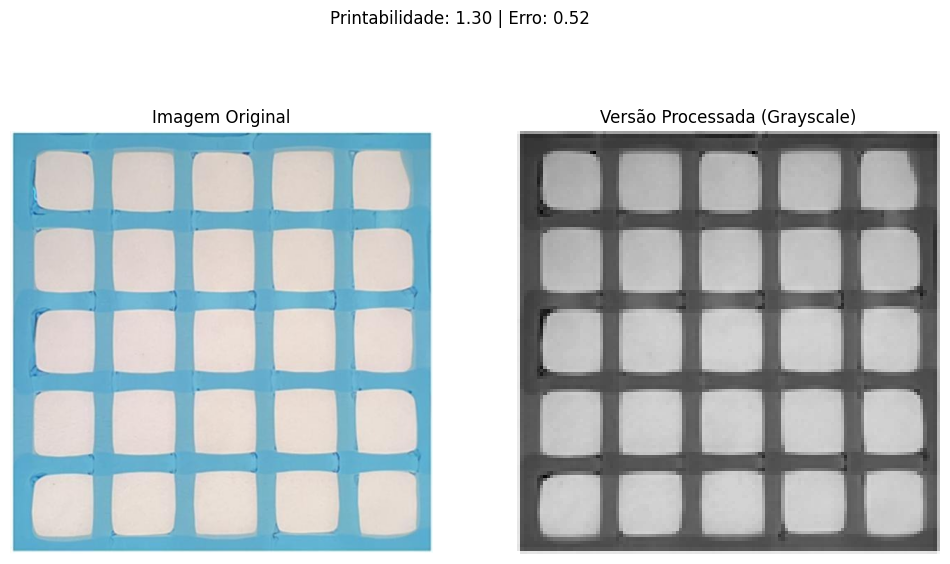

In [3]:
import tensorflow as tf
from PIL import Image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import os

# 1) Carrega o modelo treinado
modelo = tf.keras.models.load_model('/content/Printabilidade_geral.keras')

# 2) Função de pré-processamento (igual ao usado no treino)
def preprocessar_imagem(caminho):
    # Abre a imagem e converte para RGB
    img = Image.open(caminho).convert('RGB')

    # Redimensiona para 128x128
    img = img.resize((128, 128))

    # Converte para array e normaliza
    img_array = np.array(img) / 255.0

    # Converte para grayscale manualmente, mantendo 3 canais
    img_gray = 0.299 * img_array[:,:,0] + 0.587 * img_array[:,:,1] + 0.114 * img_array[:,:,2]
    img_gray = np.stack([img_gray]*3, axis=-1)

    # Adiciona dimensão do batch
    img_gray = np.expand_dims(img_gray, axis=0)  # (1, 128, 128, 3)

    return img_gray.astype(np.float32)

# 3) Faz a predição
def predizer(caminho):
    img = preprocessar_imagem(caminho)
    pred = modelo.predict(img)
    return pred[0][0], pred[0][1]  # [printabilidade, erro]

# 4) Upload da imagem
uploaded = files.upload()

# 5) Loop para cada imagem carregada
for filename in uploaded.keys():
    caminho = os.path.join('/content', filename)

    if filename.lower().endswith('.png'):
        # Faz a predição
        printab, erro = predizer(caminho)

        # Exibe imagem original e a processada
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Imagem original
        img_original = Image.open(caminho)
        ax1.imshow(img_original)
        ax1.set_title('Imagem Original')
        ax1.axis('off')

        # Imagem processada (grayscale)
        img_processada = preprocessar_imagem(caminho)[0]  # Remove batch
        ax2.imshow(img_processada[:,:,0], cmap='gray')  # Um canal
        ax2.set_title('Versão Processada (Grayscale)')
        ax2.axis('off')

        plt.suptitle(f"Printabilidade: {printab:.2f} | Erro: {erro:.2f}", y=1.05)
        plt.show()

    else:
        print(f"Arquivo {filename} ignorado. Por favor, envie uma imagem PNG.")
